In [8]:
from functools import partial
from typing import Callable
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize
import numpy as np


def f(x: list[float], coeffs: list[float]) -> float:
    '''return a(x1 - b)^2 + c(x2 - d)^2'''
    return coeffs[0]*(x[0] - coeffs[1])**2 + coeffs[2]*(x[1] - coeffs[3])**2

f1 = partial(f, coeffs=[2,  6, 3,  6])

f2 = partial(f, coeffs=[3, -4, 1, -6])

f3 = partial(f, coeffs=[1, -7, 2,  8])

funcs = [f1, f2, f3]

concessions = [200, 62, 180]

x0 = [.0, .0]

In [10]:
def convolution(
        x0: list[float],
        alphas: list[float],
        funcs: list[Callable[[float, float], float]]
) -> float:
    '''Свертка. Возврат Σ(alpha * f(x))'''
    return sum([
        alpha * func(x0) for alpha, func in zip(alphas, funcs)
    ])

def generate_points():
    ls = []
    for i in range(10):
        for j in range(10 - i):
            ls.append([i / 10, j / 10, (10 - i - j) / 10])
    return ls

def funcs_values_from_x(x, funcs):
    return [f(x) for f in funcs]

def discriminatory_method(
        x0: list[float],
        funcs: Callable,
        concessions: list[float]
):
    num_alphas = generate_points()
    pareto_points = []
    for i in range(len(num_alphas)):
        F = partial(convolution, alphas=num_alphas[i], funcs=funcs)
        constraints = NonlinearConstraint(
            fun=partial(funcs_values_from_x, funcs=funcs),
            lb=-np.inf,
            ub=concessions
        )
        pareto_points.append(minimize(F, x0, constraints=constraints).x)

    pareto_points = np.array(pareto_points)
    return pareto_points

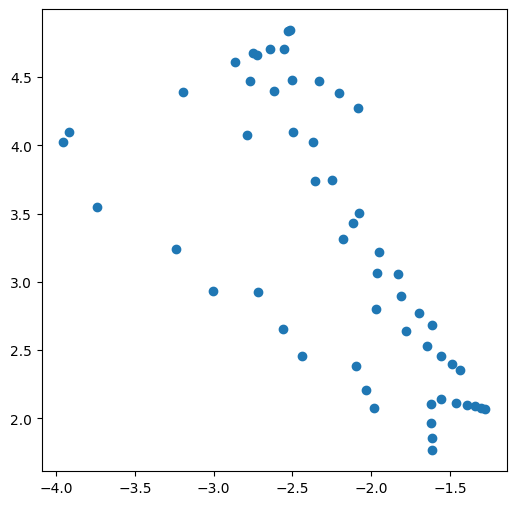

In [35]:
import matplotlib.pyplot as plt

points = np.array(discriminatory_method(x0, funcs, concessions=[20, 30, 40]))

plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1])
plt.show()